In [1]:
import os
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize MediaPipe Hands solution
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.9)


In [2]:
data_dir = 'C:/Users/prath/Downloads/ASL-Gesture-Recognition-master/asl_dataset/asl_alphabet_train/'

data = []
labels = []
for i in sorted(os.listdir(data_dir)):
    if i == '.DS_Store':
        pass
    else:
        for j in os.listdir(os.path.join(data_dir,i)):
            print(j)
            data_aux = []
            img = cv2.imread(os.path.join(data_dir,i,j))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            results = hands.process(img_rgb)
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    for z in range(len(hand_landmarks.landmark)):
                        x = hand_landmarks.landmark[z].x
                        y = hand_landmarks.landmark[z].y
                        data_aux.append(x)
                        data_aux.append(y)
                data.append(data_aux)
                labels.append(i)

# Save the data
with open('data.pickle', 'wb') as f:
    pickle.dump({'data': data, 'labels': labels}, f)


A1.jpg
A10.jpg
A100.jpg
A1000.jpg
A1001.jpg
A1002.jpg


C:\Users\prath\AppData\Roaming\Python\Python312\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


A1003.jpg
A1004.jpg
A1005.jpg
A1006.jpg
A1007.jpg
A1008.jpg
A1009.jpg
A101.jpg
A1010.jpg
A1011.jpg
A1012.jpg
A1013.jpg
A1014.jpg
A1015.jpg
A1016.jpg
A1017.jpg
A1018.jpg
A1019.jpg
A102.jpg
A1020.jpg
A1021.jpg
A1022.jpg
A1023.jpg
A1024.jpg
A1025.jpg
A1026.jpg
A1027.jpg
A1028.jpg
A1029.jpg
A103.jpg
A1030.jpg
A1031.jpg
A1032.jpg
A1033.jpg
A1034.jpg
A1035.jpg
A1036.jpg
A1037.jpg
A1038.jpg
A1039.jpg
A104.jpg
A1040.jpg
A1041.jpg
A1042.jpg
A1043.jpg
A1044.jpg
A1045.jpg
A1046.jpg
A1047.jpg
A1048.jpg
A1049.jpg
A105.jpg
A1050.jpg
A1051.jpg
A1052.jpg
A1053.jpg
A1054.jpg
A1055.jpg
A1056.jpg
A1057.jpg
A1058.jpg
A1059.jpg
A106.jpg
A1060.jpg
A1061.jpg
A1062.jpg
A1063.jpg
A1064.jpg
A1065.jpg
A1066.jpg
A1067.jpg
A1068.jpg
A1069.jpg
A107.jpg
A1070.jpg
A1071.jpg
A1072.jpg
A1073.jpg
A1074.jpg
A1075.jpg
A1076.jpg
A1077.jpg
A1078.jpg
A1079.jpg
A108.jpg
A1080.jpg
A1081.jpg
A1082.jpg
A1083.jpg
A1084.jpg
A1085.jpg
A1086.jpg
A1087.jpg
A1088.jpg
A1089.jpg
A109.jpg
A1090.jpg
A1091.jpg
A1092.jpg
A1093.jpg
A1094.jpg

C:\Users\prath\AppData\Local\Temp\ipykernel_1556\94011524.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


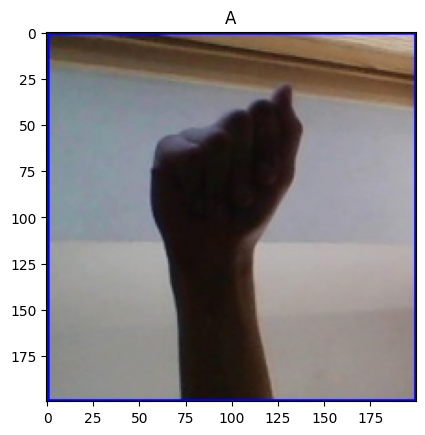

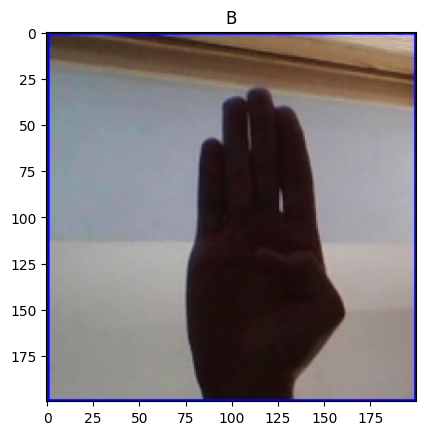

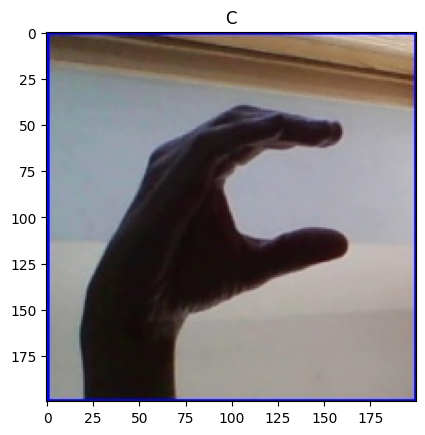

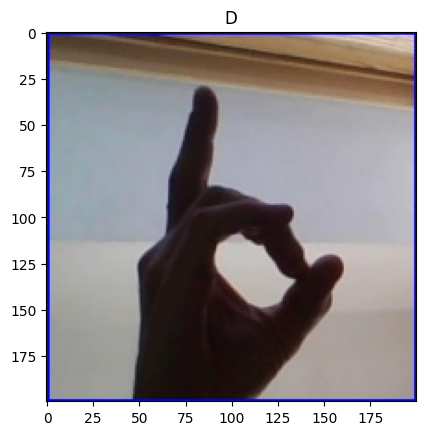

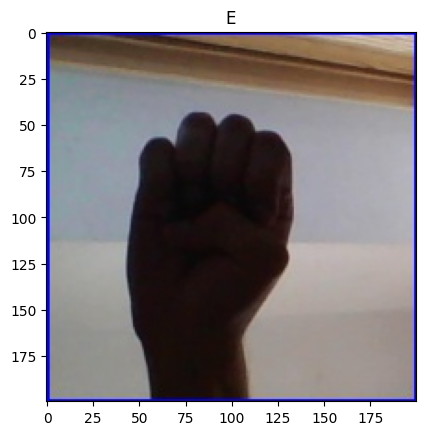

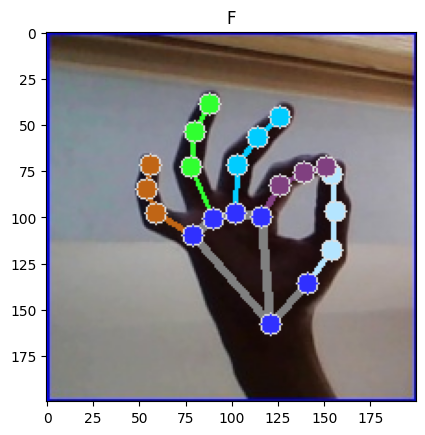

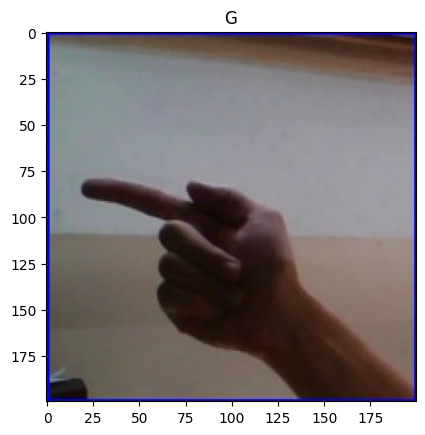

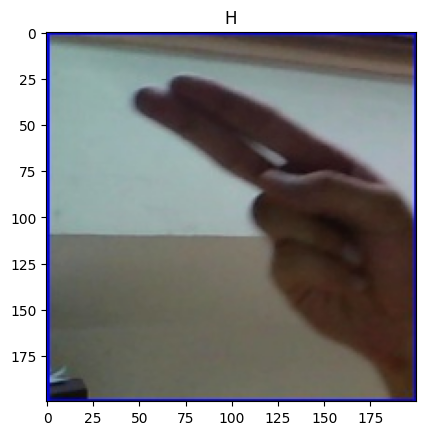

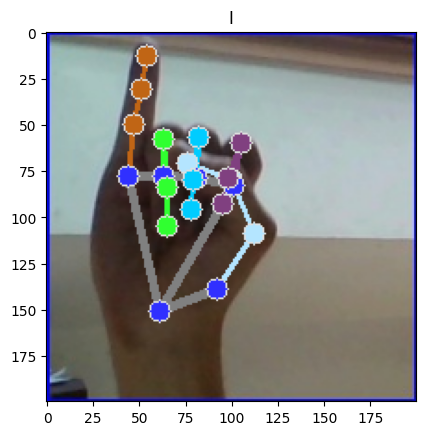

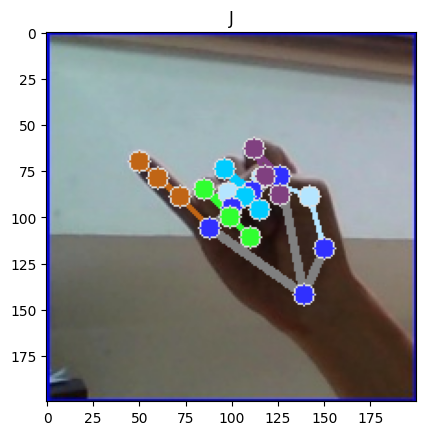

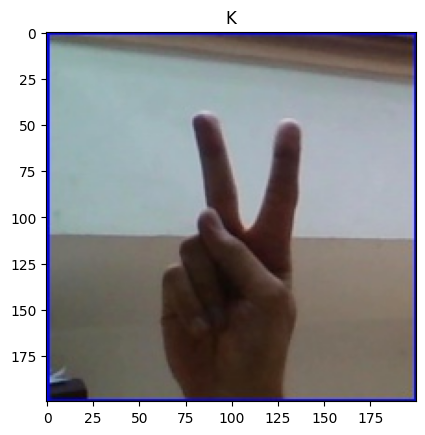

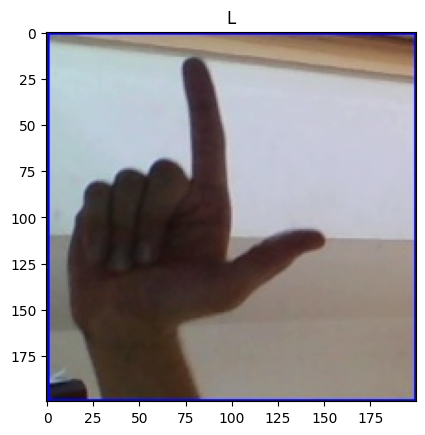

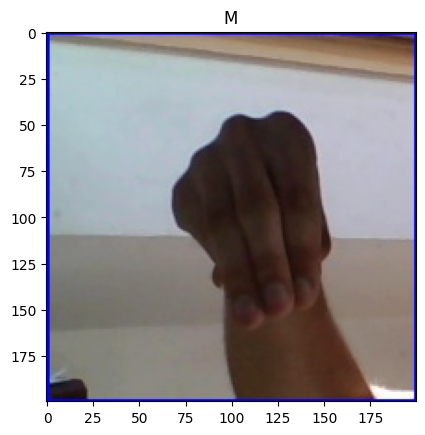

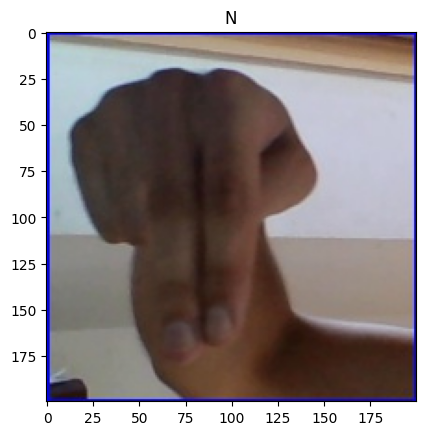

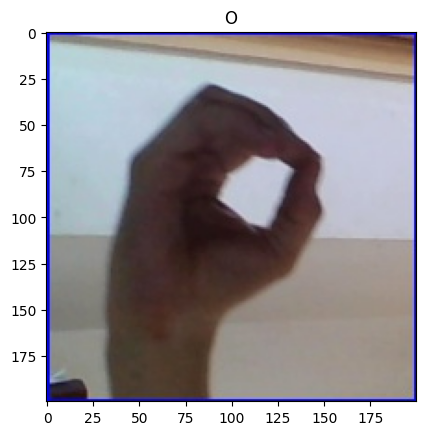

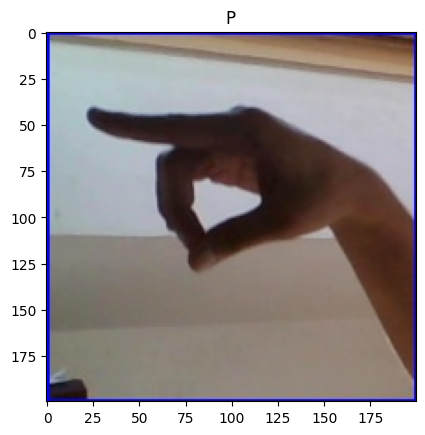

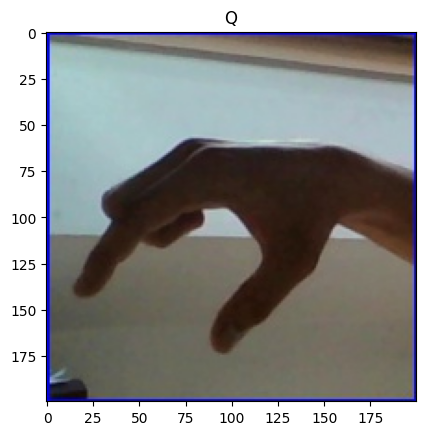

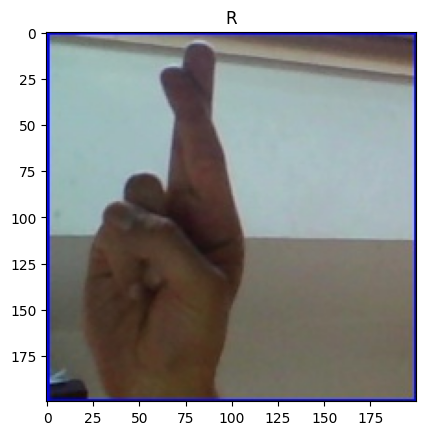

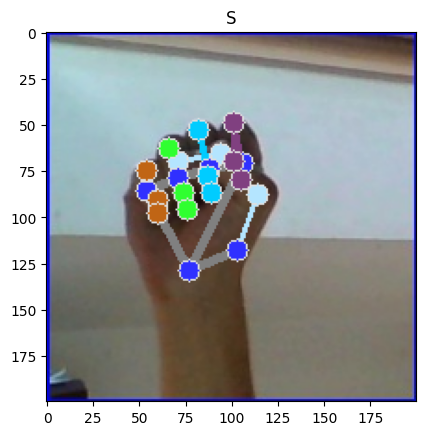

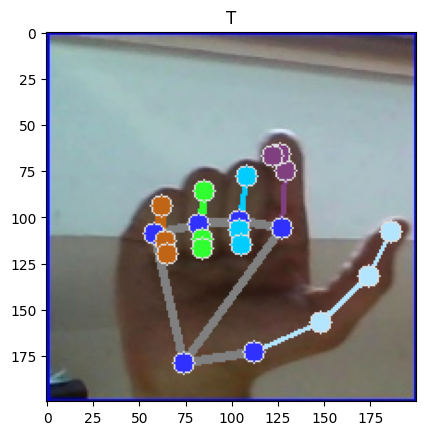

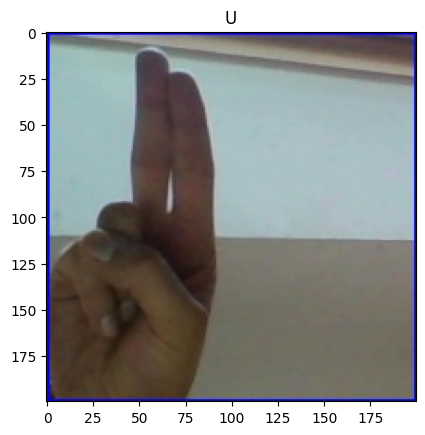

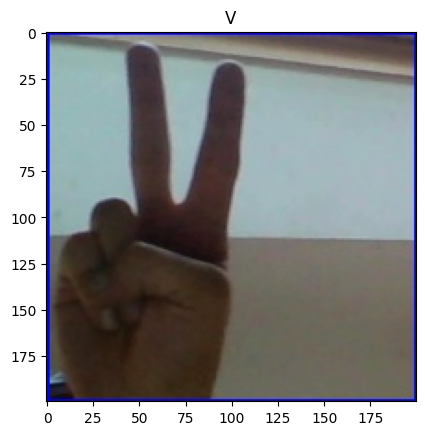

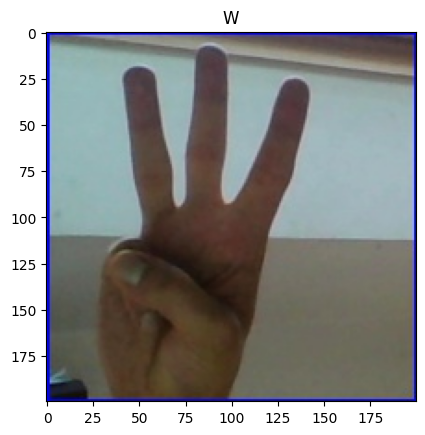

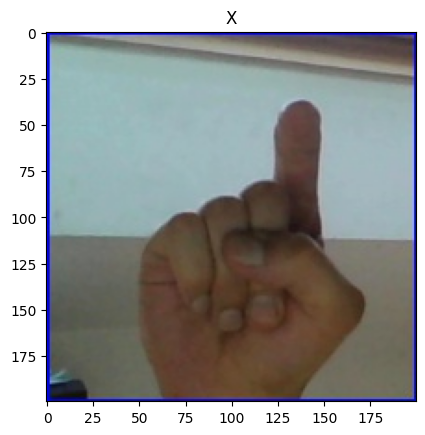

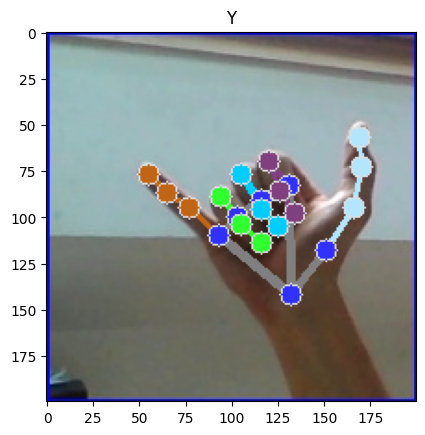

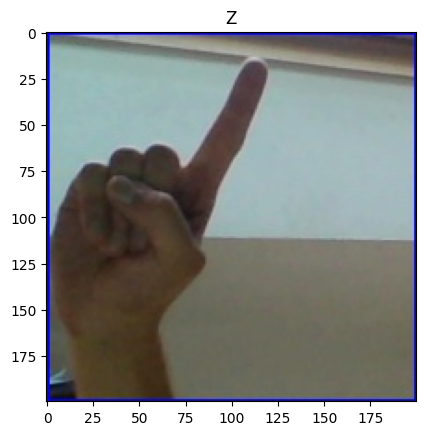

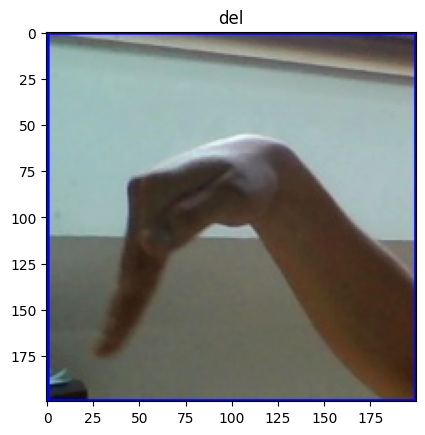

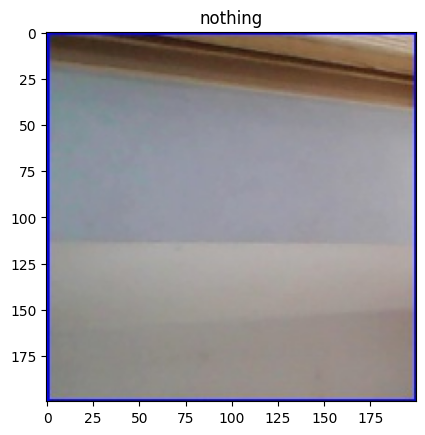

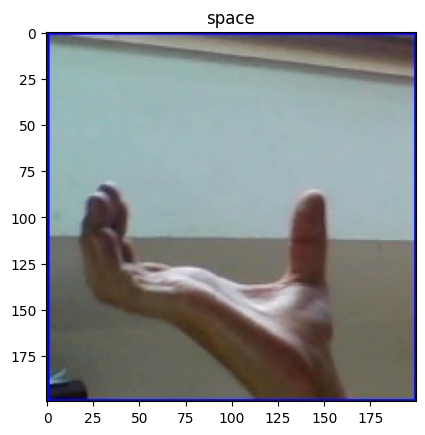

In [3]:
data_dir = 'C:/Users/prath/Downloads/ASL-Gesture-Recognition-master/asl_dataset/asl_alphabet_train/'
for i in sorted(os.listdir(data_dir)):
    if i == '.DS_Store':
        pass
    else:
        for j in os.listdir(os.path.join(data_dir,i))[0:1]:
            img = cv2.imread(os.path.join(data_dir,i,j))
            img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

            results = hands.process(img_rgb)
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    mp_drawing.draw_landmarks(
                        img_rgb, # img to draw
                        hand_landmarks,
                        mp_hands.HAND_CONNECTIONS,
                        mp_drawing_styles.get_default_hand_landmarks_style(),
                        mp_drawing_styles.get_default_hand_connections_style()

                    )

            
            plt.figure()
            plt.title(i)
            plt.imshow(img_rgb)
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(np.array(data), labels, test_size=0.15, random_state=22, shuffle=True)

# model
model = RandomForestClassifier(random_state=22)
model.fit(X_train,y_train)

# predict
pred=model.predict(X_test)

# accruracy
accuracy_score(y_test,pred)

0.9903724747474747

In [5]:
f = open('model.p', 'wb')
pickle.dump({'model':model},f)
f.close() 

In [6]:
model_dict = pickle.load(open('model.p','rb'))
model = model_dict['model']

In [19]:
import cv2
import mediapipe as mp
import numpy as np

word_dict = {
    'A': ['Apple', 'Ant', 'Axe'],
    'B': ['Ball', 'Bat', 'Banana'],
    'C': ['Cat', 'Car', 'Cup'],
    'D': ['Dog', 'Duck', 'Door'],
    'E': ['Elephant', 'Egg', 'Eagle'],
    'F': ['Fish', 'Frog', 'Fan'],
    'G': ['Giraffe', 'Goat', 'Grapes'],
    'H': ['Hat', 'House', 'Horse'],
    'I': ['Ice cream', 'Iron', 'Igloo'],
    'J': ['Juice', 'Jaguar', 'Jar'],
    'K': ['Kite', 'Key', 'Kangaroo'],
    'L': ['Lion', 'Lamp', 'Leaf'],
    'M': ['Monkey', 'Moon', 'Mango'],
    'N': ['Nest', 'Net', 'Nail'],
    'O': ['Owl', 'Orange', 'Oven'],
    'P': ['Penguin', 'Pineapple', 'Pencil'],
    'Q': ['Queen', 'Quilt', 'Quail'],
    'R': ['Rabbit', 'Rainbow', 'Rocket'],
    'S': ['Snake', 'Star', 'Sun'],
    'T': ['Tiger', 'Tree', 'Turtle'],
    'U': ['Umbrella', 'Unicorn', 'Urchin'],
    'V': ['Violin', 'Vase', 'Vulture'],
    'W': ['Whale', 'Watch', 'Wolf'],
    'X': ['Xylophone', 'X-ray', 'Xenon'],
    'Y': ['Yacht', 'Yak', 'Yo-yo'],
    'Z': ['Zebra', 'Zoo', 'Zipper'],
    'del': ['Delete', 'Remove', 'Clear'],
    'nothing': ['No input', 'None', 'Blank'],
    'space': ['Space', 'Gap', 'Pause']
}

cap = cv2.VideoCapture(0)
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

is_paused = False

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.8) as hands:
    while cap.isOpened():
        if not is_paused:
            data_aux = []
            x_ = []
            y_ = []

            ret, frame = cap.read()
            H, W, _ = frame.shape

            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_rgb = cv2.flip(frame_rgb, 1)
            frame_rgb.flags.writeable = False
            results = hands.process(frame_rgb)
            frame_rgb.flags.writeable = True 
            frame_rgb = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)

            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    mp_drawing.draw_landmarks(
                        frame_rgb, # img to draw
                        hand_landmarks,
                        mp_hands.HAND_CONNECTIONS,
                        mp_drawing.DrawingSpec(color=(28, 255, 3), thickness=5, circle_radius=10),
                        mp_drawing.DrawingSpec(color=(236, 255, 3), thickness=5, circle_radius=10)
                    )

                for hand_landmarks in results.multi_hand_landmarks:
                    for i in range(len(hand_landmarks.landmark)):
                        x = hand_landmarks.landmark[i].x
                        y = hand_landmarks.landmark[i].y
                        data_aux.append(x)
                        data_aux.append(y)
                        x_.append(x)
                        y_.append(y)

                x1 = int(min(x_) * W)-10
                y1 = int(min(y_) * H)-10
                x2 = int(max(x_) * W)-10
                y2 = int(max(y_) * H)-10

                # Predict the gesture
                prediction = model.predict([np.array(data_aux)[0:42]])[0]
                predicted_letter = prediction.upper()
                words = word_dict.get(predicted_letter, ['No words available'])

                cv2.rectangle(frame_rgb, (x1, y1-10), (x2, y2), (255,99,173), 6)
                cv2.putText(frame_rgb, prediction, (x1, y1), cv2.FONT_HERSHEY_DUPLEX, 5, (255,0,0), 5, cv2.LINE_AA)

                for i, word in enumerate(words):
                    cv2.putText(frame_rgb, f"{i}: {word}", (x1, y2 + (i + 1) * 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

            cv2.imshow('frame', frame_rgb)

        # Wait for key press and check if 'p' or 'r' is pressed
        key = cv2.waitKey(10) & 0xFF

        if key == ord('p'):
            # Pause the frame
            is_paused = True
            print("Paused. Type an index number for selection, then press 'r' to resume.")

        elif is_paused and key >= ord('0') and key <= ord('9'):
            # Capture index in pause mode and print selected word
            index = key - ord('0')
            if index < len(words):
                selected_word = words[index]
                print(f"Selected word: {selected_word}")

        elif key == ord('r'):
            # Resume the video feed
            is_paused = False
            print("Resuming...")

        elif key == ord('q'):
            # Quit the program
            break

cap.release()
cv2.destroyAllWindows()


C:\Users\prath\AppData\Roaming\Python\Python312\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\prath\AppData\Roaming\Python\Python312\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
C:\Users\prath\AppData\Roaming\Python\Python312\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. P

In [8]:
import matplotlib.pyplot as plt

# Initialize lists to store accuracy scores
accuracy_scores = []

# Run multiple training-test splits and store accuracy
for i in range(10):  # Adjust the range for more iterations
    # Split the dataset randomly
    X_train, X_test, y_train, y_test = train_test_split(np.array(data), labels, test_size=0.15, random_state=i, shuffle=True)

    # Train the model
    model = RandomForestClassifier(random_state=22)
    model.fit(X_train, y_train)

    # Predict and calculate accuracy
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores
plt.plot(range(1, len(accuracy_scores) + 1), accuracy_scores, marker='o')
plt.title("Model Accuracy over Multiple Runs")
plt.xlabel("Run")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.grid(True)
plt.show()


KeyboardInterrupt: 